In [7]:
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:


def ik_2d(x, y, L1, L2):
    r = np.hypot(x, y)
    if r > (L1 + L2):
        raise ValueError("Ponto fora do alcance do braço.")

    cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    sin_theta2 = np.sqrt(1 - cos_theta2**2)
    theta2 = np.arctan2(sin_theta2, cos_theta2)

    k1 = L1 + L2 * cos_theta2
    k2 = L2 * sin_theta2
    theta1 = np.arctan2(y, x) - np.arctan2(k2, k1)

    return np.degrees(theta1), np.degrees(theta2)

# Exemplo:
x_desejado, y_desejado = 1.0, 0.5
L1, L2 = 1.0, 1.0

theta1, theta2 = ik_2d(x_desejado, y_desejado, L1, L2)
print(f"Theta1 = {theta1:.2f}°, Theta2 = {theta2:.2f}°")


Theta1 = -29.45°, Theta2 = 112.02°


In [3]:

def cinematica_direta(theta1, theta2, L1, L2):
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y


In [4]:
def cinematica_inversa(x, y, L1, L2):
    r = np.hypot(x, y)
    if r > (L1 + L2):
        raise ValueError("Ponto fora do alcance.")

    cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    sin_theta2 = np.sqrt(1 - cos_theta2**2)
    theta2 = np.arctan2(sin_theta2, cos_theta2)

    k1 = L1 + L2 * cos_theta2
    k2 = L2 * sin_theta2
    theta1 = np.arctan2(y, x) - np.arctan2(k2, k1)

    return theta1, theta2


In [12]:
# Parâmetros do braço
L1, L2 = 1.0, 1.0

# Ponto desejado
x_desejado, y_desejado = 0.75, 0.55

# Obter ângulos pela cinemática inversa
theta1, theta2 = cinematica_inversa(x_desejado, y_desejado, L1, L2)

# Recalcular a posição com a cinemática direta
x_calc, y_calc = cinematica_direta(theta1, theta2, L1, L2)

# Comparar os resultados
erro_x = abs(x_desejado - x_calc)
erro_y = abs(y_desejado - y_calc)

print(f"Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°")
print(f"Posição recalculada: x = {x_calc:.3f}, y = {y_calc:.3f}")
print(f"Erro: dx = {erro_x:.6f}, dy = {erro_y:.6f}")


Theta1 = -26.03°, Theta2 = 124.58°
Posição recalculada: x = 0.750, y = 0.550
Erro: dx = 0.000000, dy = 0.000000


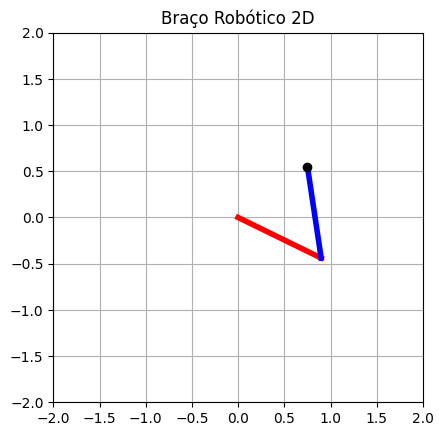

In [13]:
def plot_braco(theta1, theta2, L1, L2):
    x0, y0 = 0, 0
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)
    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)

    plt.plot([x0, x1], [y0, y1], 'r-', linewidth=4)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=4)
    plt.plot(x2, y2, 'ko')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.title("Braço Robótico 2D")
    plt.show()

plot_braco(theta1, theta2, L1, L2)

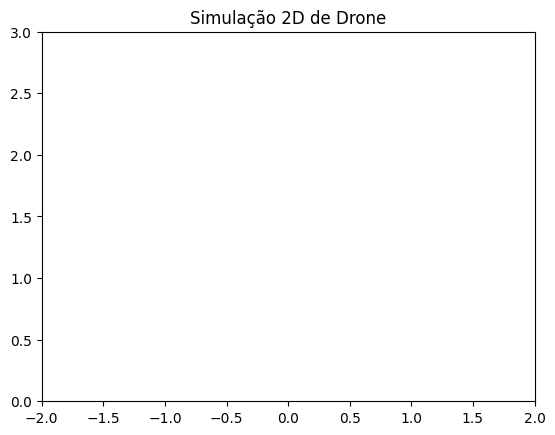

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Inicializa estado do drone
x = 0
y = 0
theta = 0  # ângulo de inclinação

# Parâmetros físicos
g = 9.81
m = 1.0
L = 0.3

# Inicialização da figura
fig, ax = plt.subplots()
line, = ax.plot([], [], 'ko-', linewidth=4)
ax.set_xlim(-2, 2)
ax.set_ylim(0, 3)
ax.set_aspect('equal')

def drone_pos(x, y, theta):
    """Calcula posições da barra do drone"""
    x1 = x - L * np.cos(theta)
    y1 = y - L * np.sin(theta)
    x2 = x + L * np.cos(theta)
    y2 = y + L * np.sin(theta)
    return [x1, x2], [y1, y2]

def init():
    line.set_data([], [])
    return line,

def update(frame):
    global x, y, theta

    # Simulação tosca de movimento
    theta += 0.01 * np.sin(frame / 10)
    y += 0.01
    x += 0.005 * np.cos(frame / 20)

    x_line, y_line = drone_pos(x, y, theta)
    line.set_data(x_line, y_line)
    return line,

ani = animation.FuncAnimation(fig, update, init_func=init,
                              frames=200, interval=50, blit=True)
plt.title("Simulação 2D de Drone")
plt.show()
